In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df = df[["Country" , "Age", "EdLevel" , "YearsCodePro" , "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,Age,EdLevel,YearsCodePro,Employment,Salary
0,Germany,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,31.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [4]:
df = df[df["Salary"].notnull()]
df = df[df["Age"].notnull()]
df.head()

,Country,Age,EdLevel,YearsCodePro,Employment,Salary
7,United States,36.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,22.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,23.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,49.0,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,53.0,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30596 entries, 7 to 64152
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30596 non-null  object 
 1   Age           30596 non-null  float64
 2   EdLevel       30108 non-null  object 
 3   YearsCodePro  30500 non-null  object 
 4   Employment    30563 non-null  object 
 5   Salary        30596 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.6+ MB


In [6]:
df = df.dropna()
df.isnull().sum()

Country         0
Age             0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [7]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26487 entries, 7 to 64152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       26487 non-null  object 
 1   Age           26487 non-null  float64
 2   EdLevel       26487 non-null  object 
 3   YearsCodePro  26487 non-null  object 
 4   Salary        26487 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [8]:
df['Country'].value_counts()

Country
United States     6724
United Kingdom    2066
India             1985
Germany           1723
Canada            1039
                  ... 
Bahamas              1
Guinea               1
Benin                1
Namibia              1
Yemen                1
Name: count, Length: 148, dtype: int64

In [9]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [10]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                 7457
United States         6724
United Kingdom        2066
India                 1985
Germany               1723
Canada                1039
France                 889
Brazil                 885
Spain                  606
Netherlands            592
Australia              582
Poland                 512
Italy                  502
Russian Federation     470
Sweden                 455
Name: count, dtype: int64

count    2.648700e+04
mean     1.075343e+05
std      2.333574e+05
min      0.000000e+00
25%      2.756500e+04
50%      5.584700e+04
75%      9.675400e+04
max      2.000000e+06
Name: Salary, dtype: float64
0


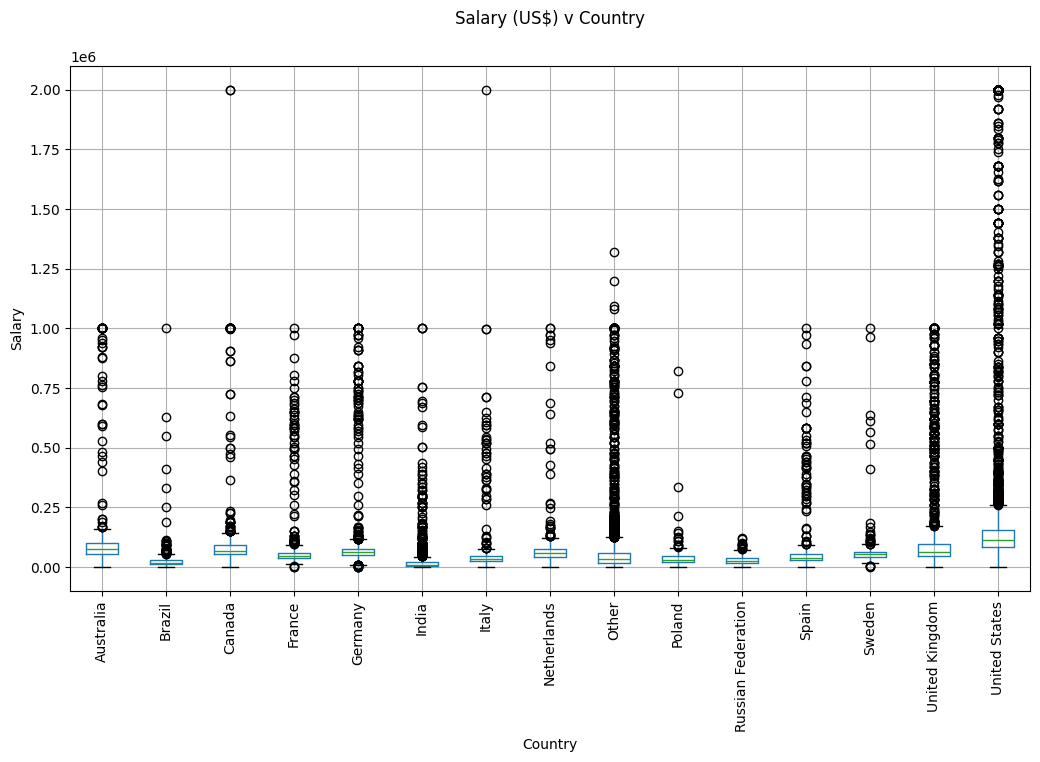

In [11]:
print(df['Salary'].describe())
print(df['Salary'].isna().sum())

fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] > 10000]
df = df[df["Country"] != 'Other']

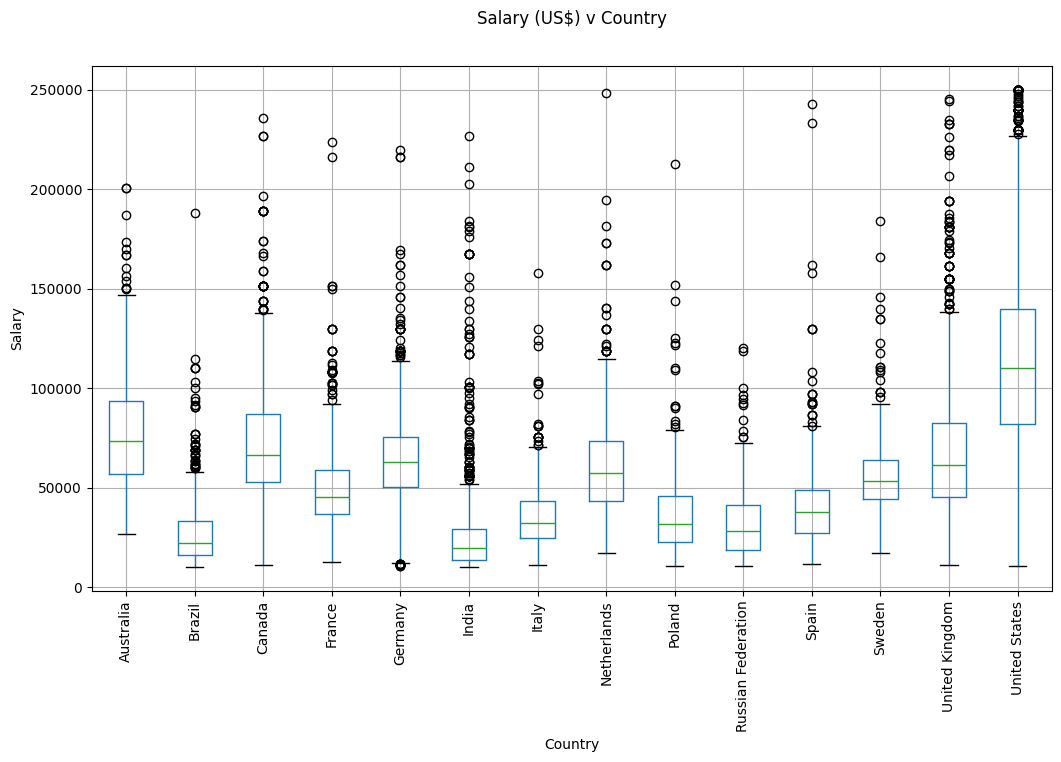

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df["Age"].unique()

array([ 36. ,  22. ,  23. ,  49. ,  53. ,  27. ,  25. ,  24. ,  45. ,
        31. ,  34. ,  35. ,  32. ,  38. ,  28. ,  44. ,  48. ,  21. ,
        30. ,  42. ,  29. ,  26. ,  37. ,  43. ,  40. ,  57. ,  41. ,
        50. ,  59. ,  62. ,  33. ,  51. ,  39. ,  52. ,  46. ,  49.5,
        63. ,  47. ,  56. ,  19. ,  54. ,  20. ,  61. ,  60. ,  26.8,
        64. ,  65. ,  84. ,  55. ,  58. ,  68. ,  18. ,  69. ,  17. ,
        32.5,  23.8,  70. ,  66. , 279. ,  73. ,  22.5,  27.5,   1. ,
        67. ,  31.5,  39.5,  72. ,  81. ,  83. ])

In [15]:
def clean_age(x):
    if x > 60:
        return 60
    if x < 18:
        return 18
    return x

df['Age'] = df['Age'].apply(clean_age)

In [16]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [17]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [18]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [19]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [21]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [22]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [23]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [24]:
y_pred = linear_reg.predict(X)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [26]:
error

np.float64(38754.83819947047)

In [27]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred = dec_tree_reg.predict(X)

In [29]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}" .format(error))

$23,560.13


In [30]:
##FINDING BEST MODEL

from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [31]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}" .format(error))

$30,683.21


In [32]:
X

,Country,Age,EdLevel,YearsCodePro
7,13,36.0,0,13.0
9,12,22.0,2,4.0
10,12,23.0,0,2.0
11,10,49.0,1,7.0
12,7,53.0,1,20.0
...,...,...,...,...
61917,4,36.0,0,16.0
61921,6,36.0,2,6.0
61993,12,31.0,0,7.0
63402,13,32.0,1,7.0


In [42]:
X = np.array([["United States", 20, 'Master’s degree', 15 ]])
X

array([['United States', '20', 'Master’s degree', '15']], dtype='<U21')

In [44]:
X = df[["Country", "Age", "EdLevel", "YearsCodePro"]]
y = df["Salary"]

In [34]:
country = le_country.transform(["United States"])
age = np.array([20])
education = le_education.transform(["Master’s degree"])
experience = np.array([15])


X_pred = np.array([[country[0], age[0], education[0], experience[0]]])

salary = regressor.predict(X_pred)

print("Predicted salary:", salary[0])

Predicted salary: 137270.8785046729


/Users/beratozlu/miniconda3/envs/mlapp/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

error = np.sqrt(mean_squared_error(y_test, y_pred))

print("${:,.02f}".format(error))

$31,608.06


In [35]:
import pickle

In [36]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [37]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [38]:
country = le_country.transform(["United States"])[0]
education = le_education.transform(["Master’s degree"])[0]
experience = 15

In [39]:
X_pred = pd.DataFrame(
    [[country, education, experience]],
    columns=["Country", "EdLevel", "YearsCodePro"]
)

In [40]:
salary = regressor_loaded.predict(X_pred)
print("Predicted salary:", salary[0])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Age


In [ ]:
print(regressor.n_features_in_)